<a href="https://colab.research.google.com/github/MehtaManan07/py_projects/blob/main/Traffic_signs_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np 
import pandas as pd 
import os

In [53]:
!pip install opendatasets
import opendatasets as od
# {"username":"mananmehta83","key":"fc88a65e709fb15d8ed3dac730ea5f10"}
od.download("https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Skipping, found downloaded files in "./traffic-sign-dataset-classification" (use force=True to force download)


In [54]:
labels=pd.read_csv("/content/traffic-sign-dataset-classification/labels.csv")
labels.head(45)

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Dont Go straight or Right


In [55]:
dic={}
for i in range(labels.shape[0]):
    dic[i]=labels.iloc[i]['Name']

In [56]:
dic

{0: 'Speed limit (5km/h)',
 1: 'Speed limit (15km/h)',
 2: 'Speed limit (30km/h)',
 3: 'Speed limit (40km/h)',
 4: 'Speed limit (50km/h)',
 5: 'Speed limit (60km/h)',
 6: 'Speed limit (70km/h)',
 7: 'speed limit (80km/h)',
 8: 'Dont Go straight or left',
 9: 'Dont Go straight or Right',
 10: 'Dont Go straight',
 11: 'Dont Go Left',
 12: 'Dont Go Left or Right',
 13: 'Dont Go Right',
 14: 'Dont overtake from Left',
 15: 'No Uturn',
 16: 'No Car',
 17: 'No horn',
 18: 'Speed limit (40km/h)',
 19: 'Speed limit (50km/h)',
 20: 'Go straight or right',
 21: 'Go straight',
 22: 'Go Left',
 23: 'Go Left or right',
 24: 'Go Right',
 25: 'keep Left',
 26: 'keep Right',
 27: 'Roundabout mandatory',
 28: 'watch out for cars',
 29: 'Horn',
 30: 'Bicycles crossing',
 31: 'Uturn',
 32: 'Road Divider',
 33: 'Traffic signals',
 34: 'Danger Ahead',
 35: 'Zebra Crossing',
 36: 'Bicycles crossing',
 37: 'Children crossing',
 38: 'Dangerous curve to the left',
 39: 'Dangerous curve to the right',
 40: 'Unk

In [57]:
from PIL import Image
im = Image.open('/content/traffic-sign-dataset-classification/traffic_Data/DATA/0/000_0002.png')
im.size
# 

(165, 151)

In [58]:
from keras.preprocessing import image
x=[]
y=[]
for dirs in os.listdir('/content/traffic-sign-dataset-classification/traffic_Data/DATA'):
    for files in os.listdir("/content/traffic-sign-dataset-classification/traffic_Data/DATA/"+dirs):
        sign_img = np.array(image.load_img("/content/traffic-sign-dataset-classification/traffic_Data/DATA/"+dirs+"/"+files,target_size = (32,32)))
        x.append(sign_img)
        y.append(int(dirs))

In [59]:
from sklearn.utils import shuffle
x_shuffled, y_shuffled = shuffle(x, y)

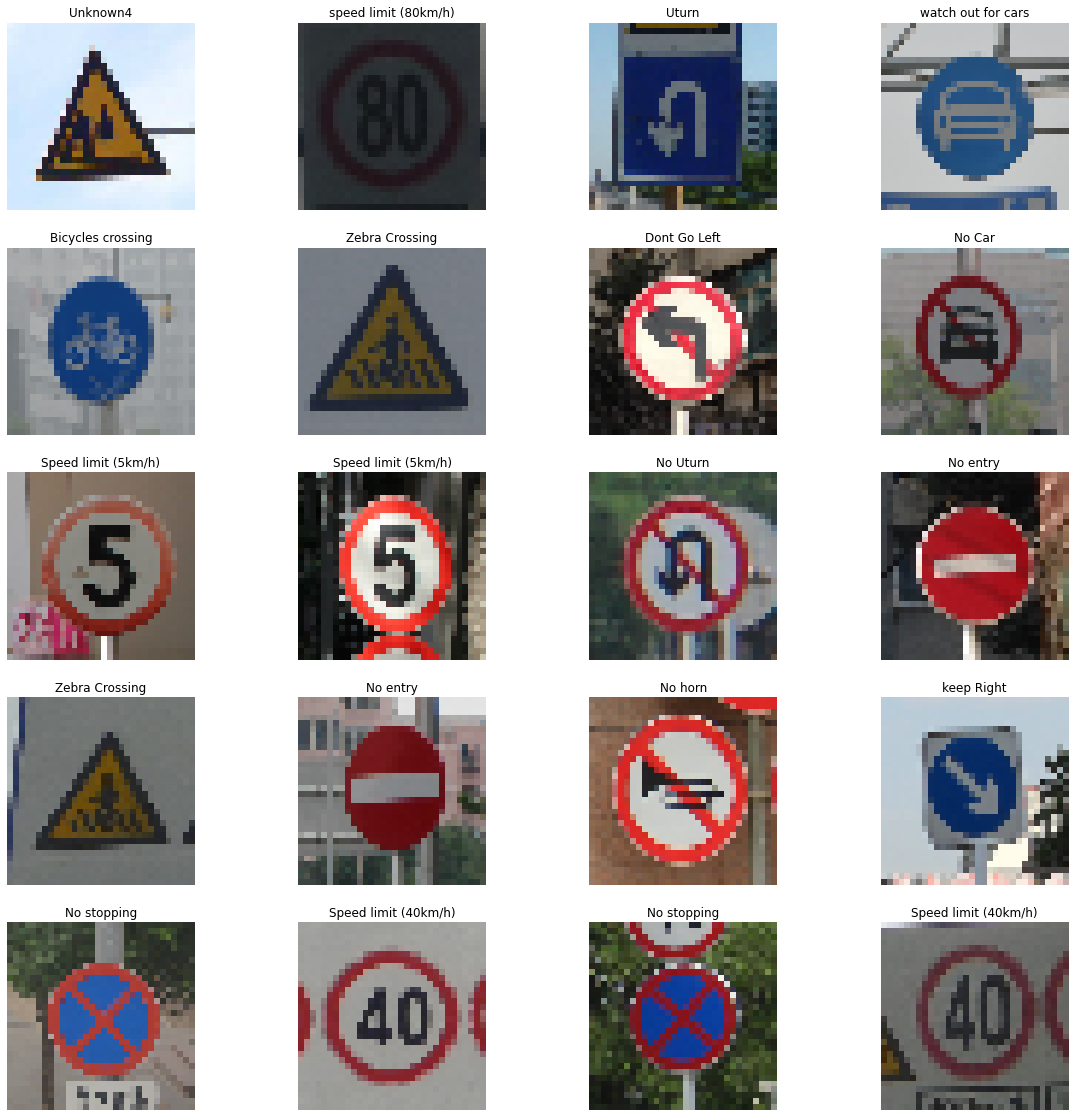

In [60]:
import matplotlib.pyplot as plt
def plot_image(x,y, index):
    image = plt.imshow(x[index])
    l=plt.title(dic[y[index]])
    ax.grid(False)
    ax.axis('off')    
    return image, l
fig = plt.figure(figsize=(20, 20))

for i in range(20):
    ax = fig.add_subplot(5, 4, i + 1)
    plot_image(x_shuffled,y_shuffled, i)

plt.show()

In [61]:
x_shuffled[0].shape

(32, 32, 3)

In [62]:
len(y_shuffled)

4170

In [63]:
import keras
y_categorical = keras.utils.np_utils.to_categorical(y_shuffled, 58)

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_rest,y_train,y_rest=train_test_split(x_shuffled,y_categorical,test_size=0.2)

In [65]:
x_test,x_val,y_test,y_val=train_test_split(x_rest,y_rest,test_size=0.5)

In [66]:
print(len(x_train),len(y_train))
len(x_test),len(y_test)

3336 3336


(417, 417)

In [67]:
from tensorflow.keras.applications.resnet import ResNet50
from keras import backend as k
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import keras
import tensorflow as tf

In [68]:
x_train_array=np.array(x_train)
y_train_array=np.array(y_train)
x_train_scaled=x_train_array/255.0

In [69]:
x_val_array=np.array(x_val)
y_val_array=np.array(y_val)
x_val_scaled=x_val_array/1.0
x_val_scaled=x_val_scaled/255

In [70]:
x_test_array=np.array(x_test)
x_test_scaled=x_test_array/255.0

In [71]:
y_test_array=np.array(y_test)

In [72]:
resnet_model = ResNet50(weights= 'imagenet', include_top=False, input_shape= (32,32,3))

In [73]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [74]:
x = resnet_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(58, activation= 'softmax')(x)
model2 = Model(inputs = resnet_model.input, outputs = predictions)

In [75]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=3
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [77]:

history =  model2.fit(x_train_scaled, y_train_array,validation_data = (x_val_scaled, y_val_array), batch_size =256, epochs =10, verbose = 1, callbacks = [stop, checkpoint])

Epoch 1/10
14/14 [==============================] - 226s 15s/step - loss: 3.0217 - accuracy: 0.4143 - val_loss: 31.0607 - val_accuracy: 0.1103
Epoch 2/10
14/14 [==============================] - 215s 15s/step - loss: 1.0037 - accuracy: 0.7242 - val_loss: 11.4578 - val_accuracy: 0.1103
Epoch 3/10
14/14 [==============================] - 206s 15s/step - loss: 0.5593 - accuracy: 0.8357 - val_loss: 13.7179 - val_accuracy: 0.0480
Epoch 4/10
14/14 [==============================] - 203s 14s/step - loss: 0.4078 - accuracy: 0.8885 - val_loss: 25.1250 - val_accuracy: 0.0480


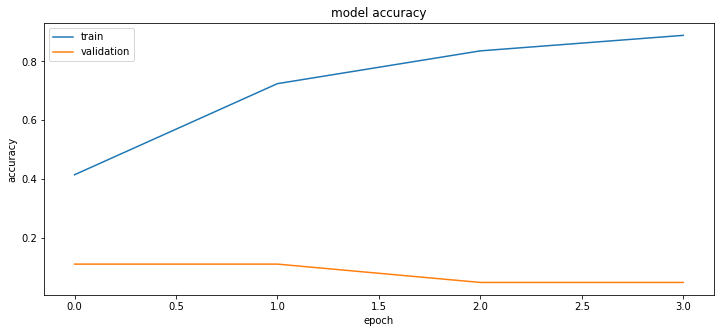

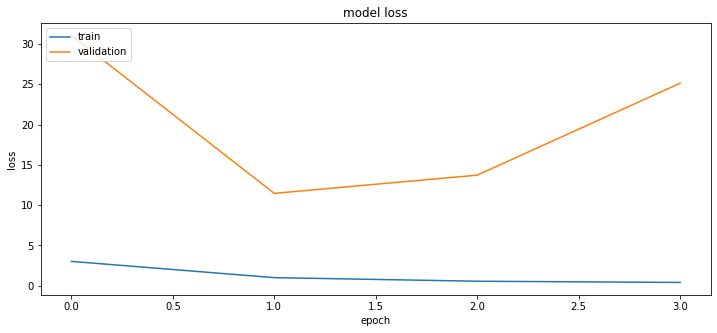

In [78]:
plt.figure(figsize=(12, 5))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.figure(figsize=(12, 5))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

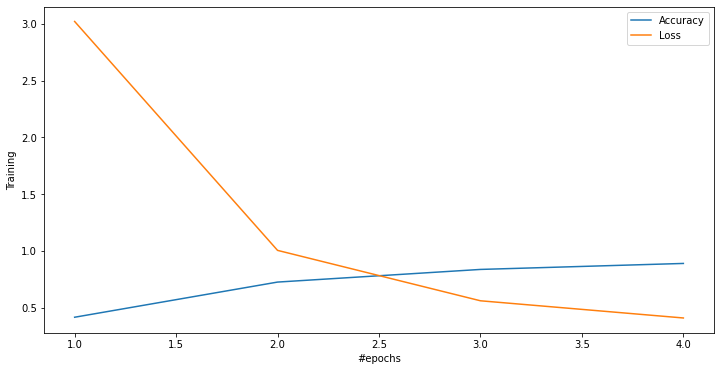

In [79]:
import seaborn as sns
q = len(list(history.history['loss']))
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['accuracy'], label = 'Accuracy')
sns.lineplot(x = range(1, 1+q), y = history.history['loss'], label = 'Loss')
plt.xlabel('#epochs')
plt.ylabel('Training')
plt.legend()